/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


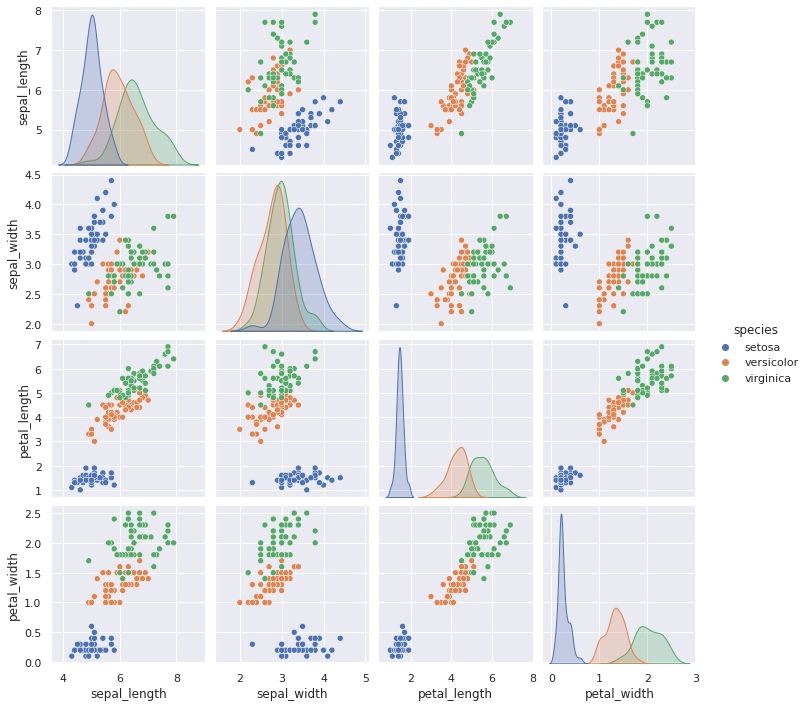

In [ ]:
import seaborn as sns # seaborn을 불러오고 SNS로 축약함.
iris=sns.load_dataset('iris')
sns.set() # seaborn style로 그림 그리기
sns.pairplot(iris,hue='species',size=2.5) # size는 그림 크기

In [ ]:
X = iris.drop('species', axis=1) # 'species'열을 drop하고 input X를 정의함.
print(X.shape)

y=iris['species']  

(150, 4)


In [ ]:
from sklearn.preprocessing import LabelEncoder # LabelEncoder() method를 불러옴
import numpy as np # numpy를 불러옴
classle=LabelEncoder() 
y=classle.fit_transform(iris['species'].values) # species 열의 문자열은 categorical 값으로 전환
print('species labels:', np.unique(y)) # 중복되는 y 값을 하나로 정리하여 print

species labels: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split  #Scikit-Learn 의 model_selection library를 train_test_split로 명명
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)  

In [ ]:
# KNN 의 적용
from sklearn.neighbors import KNeighborsClassifier  #KNN 불러오기
knn=KNeighborsClassifier(weights = 'uniform',n_neighbors=5,p=2) #5개의 인접한이웃, 거리측정기준:유클리드 
knn1 = KNeighborsClassifier(weights = 'distance', n_neighbors=5,p=2)

- 'uniform' : uniform weights.  All points in each neighborhood are weighted equally.
- 'distance' : weight points by the inverse of their distance in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [ ]:
?KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(weights = 'uniform',n_neighbors=5,p=2) 
knn.fit(X_train,y_train)
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum())
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum())

Misclassified training samples: 2
Misclassified test samples: 1


In [ ]:
knn1 = KNeighborsClassifier(weights = 'distance', n_neighbors=5,p=2)
knn1.fit(X_train,y_train)
y_train_pred=knn1.predict(X_train)
y_test_pred=knn1.predict(X_test) 
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum())
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum())

Misclassified training samples: 0
Misclassified test samples: 1


In [ ]:
knn3 = KNeighborsClassifier(weights = 'uniform', n_neighbors=3,p=2)
knn3.fit(X_train,y_train)
y_train_pred=knn3.predict(X_train)
y_test_pred=knn3.predict(X_test) 
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum())
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum())

Misclassified training samples: 4
Misclassified test samples: 1


In [ ]:
knn4 = KNeighborsClassifier(weights = 'distance', n_neighbors=3,p=2)
knn4.fit(X_train,y_train)
y_train_pred=knn4.predict(X_train)
y_test_pred=knn4.predict(X_test) 
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum())
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum())

Misclassified training samples: 0
Misclassified test samples: 1


In [ ]:
from sklearn.metrics import accuracy_score    #정확도 계산을 위한 모듈 import
print(accuracy_score(y_test,y_test_pred)) # 45개 test sample중 42개가 정확하게 분류됨.

0.9777777777777777


In [ ]:
from sklearn.metrics import confusion_matrix#  오분류표 작성을 위한 모듈 import
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) # 대각원소가 각각 setosa, versicolor, virginica를 정확하게 분류한 갯수.
print(conf)

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


 too narrow a bandwidth leads to a high-variance estimate (i.e., over-fitting), where the presence or absence of a single point makes a large difference. Too wide a bandwidth leads to a high-bias estimate (i.e., under-fitting) where the structure in the data is washed out by the wide kernel.

 optimal bandwidth

In [ ]:
?KernelDensity
# ['gaussian'|'tophat'|'epanechnikov'|'exponential'|'linear'|'cosine']

Object `KernelDensity` not found.


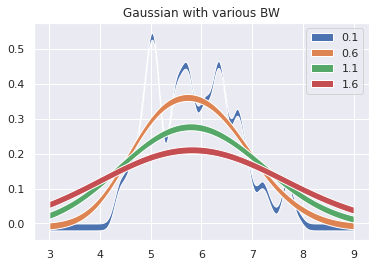

In [ ]:
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt #plot module import
import numpy as np              #numpy module import
from sklearn.neighbors import KernelDensity
xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape
bw = np.linspace(0.1, 1.6, 4)
for i in bw:
  kd=KernelDensity(bandwidth=i, kernel='gaussian')
  kd.fit(xx)
  xx_d = np.linspace(3, 9, 1000)
  logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
  plt.fill_between(xx_d, np.exp(logprob), y2 = np.exp(logprob)-0.02)
  plt.legend(bw)
  plt.title('Gaussian with various BW')

In [ ]:
bw = np.linspace(0.1, 1.6, 5)
for i in bw:
  bw_leg =list()
  bw_leg.append('BW of'+str(i))
bw_leg

['BW of1.6']

In [ ]:
?plt.legend

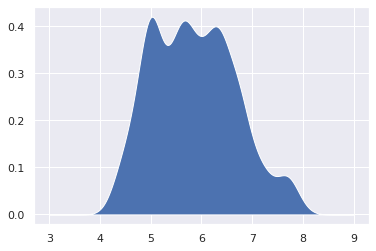

In [ ]:
# Kernel density
import matplotlib.pyplot as plt #plot module import
import numpy as np              #numpy module import
from sklearn.neighbors import KernelDensity
xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape
kd=KernelDensity(bandwidth=0.2, kernel='gaussian')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
plt.fill_between(xx_d, np.exp(logprob))

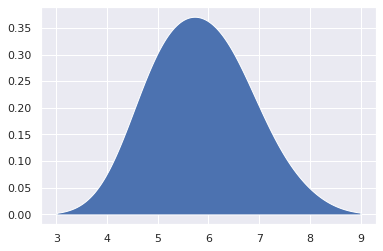

In [ ]:
xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.6, kernel='gaussian')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
plt.fill_between(xx_d, np.exp(logprob))

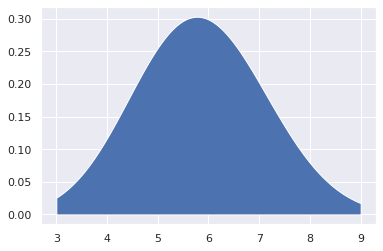

In [ ]:
xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=1, kernel='gaussian') # 멀면 멀수록 정규분포의 weight에 비례하여 줌
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
plt.fill_between(xx_d, np.exp(logprob))

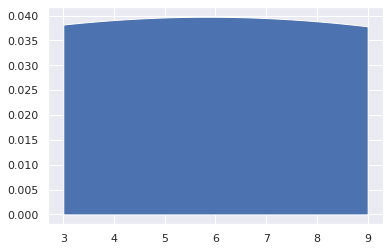

In [ ]:
xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=10, kernel='gaussian') # 멀면 멀수록 정규분포의 weight에 비례하여 줌
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
plt.fill_between(xx_d, np.exp(logprob))

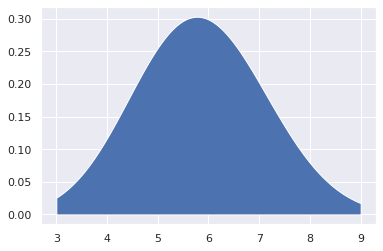

In [ ]:
xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=1, kernel='gaussian') # 멀면 멀수록 정규분포의 weight에 비례하여 줌
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
plt.fill_between(xx_d, np.exp(logprob))

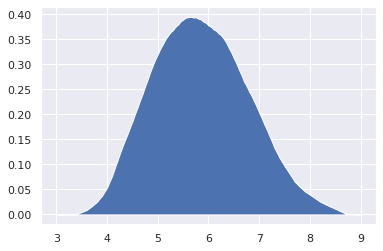

In [ ]:
xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=1, kernel='epanechnikov')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
plt.fill_between(xx_d, np.exp(logprob))

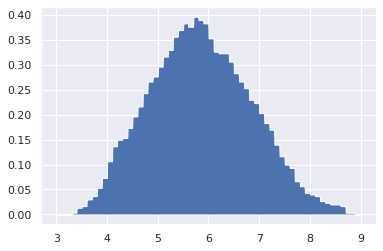

In [ ]:
xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=1, kernel='tophat')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
plt.fill_between(xx_d, np.exp(logprob))

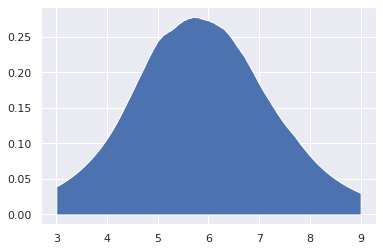

In [ ]:
xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=1, kernel='exponential')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
plt.fill_between(xx_d, np.exp(logprob))

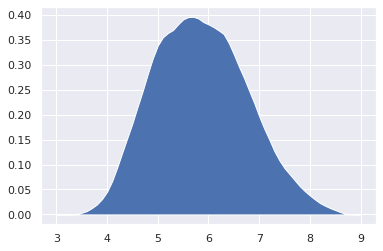

In [ ]:
xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=1, kernel='linear')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
plt.fill_between(xx_d, np.exp(logprob))

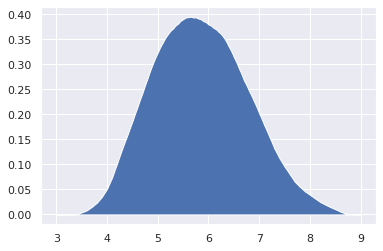

In [ ]:
xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=1, kernel='cosine')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
plt.fill_between(xx_d, np.exp(logprob))

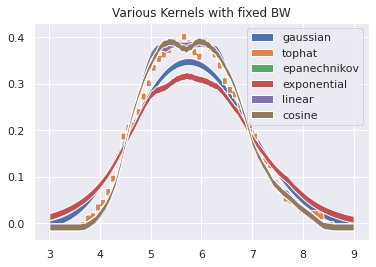

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

types1 = ['gaussian','tophat','epanechnikov']
types2 = ['exponential','linear','cosine']

for i in types:
  kd=KernelDensity(bandwidth=0.7, kernel=i)
  kd.fit(xx)
  xx_d = np.linspace(3, 9, 1000)
  logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
  plt.fill_between(xx_d, np.exp(logprob), y2 = np.exp(logprob)-0.015)
  plt.legend(types)
  plt.title('Various Kernels with fixed BW')

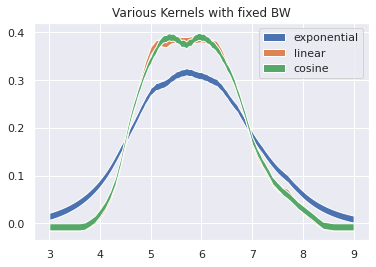

In [ ]:
for i in types2:
  kd=KernelDensity(bandwidth=0.7, kernel=i)
  kd.fit(xx)
  xx_d = np.linspace(3, 9, 1000)
  logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
  plt.fill_between(xx_d, np.exp(logprob), y2 = np.exp(logprob)-0.015)
  plt.legend(types2)
  plt.title('Various Kernels with fixed BW')